In [33]:
# Importing required packages to perform Linear regression
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import train_test_split

In [34]:
# Reading the training dataset
dataTrain = pd.read_csv('train.csv')
dataTrain.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [35]:
# Reading the test dataset
dataTest = pd.read_csv('test.csv')
dataTest.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [36]:
#Checking assumptions of Linear Reg 1. Linearity of Predictor Variables with Target
dataTrain.corr() # Correlation function

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


In [37]:
#Checking assumptions of Linear Reg 1. Normality , we shall normality univariate, multivariate is assumed with higher dimension
#sb.distplot(cars.hp)
print("Range of Skewness, S < |1.96|")
print("Skewness of crim: ",stats.skew(dataTrain.crim))
print("Kurtosis of crim: ",stats.kurtosis(dataTrain.crim))

print("Skewness of zn: ",stats.skew(dataTrain.zn))
print("Kurtosis of zn: ",stats.kurtosis(dataTrain.zn))

print("Kurtosis of indus: ",stats.kurtosis(dataTrain.indus))
print("Skewness of indus: ",stats.skew(dataTrain.indus))

print("Kurtosis of chas: ",stats.kurtosis(dataTrain.chas))
print("Skewness of chas: ",stats.skew(dataTrain.chas))

print("Skewness of nox: ",stats.skew(dataTrain.nox))
print("Kurtosis of nox: ",stats.kurtosis(dataTrain.nox))

print("Skewness of rm: ",stats.skew(dataTrain.rm))
print("Kurtosis of rm: ",stats.kurtosis(dataTrain.rm))

print("Kurtosis of age: ",stats.kurtosis(dataTrain.age))
print("Skewness of age: ",stats.skew(dataTrain.age))

print("Kurtosis of dis: ",stats.kurtosis(dataTrain.dis))
print("Skewness of dis: ",stats.skew(dataTrain.dis))

print("Kurtosis of rad: ",stats.kurtosis(dataTrain.rad))
print("Skewness of rad: ",stats.skew(dataTrain.rad))

print("Kurtosis of ptratio: ",stats.kurtosis(dataTrain.ptratio))
print("Skewness of ptratio: ",stats.skew(dataTrain.ptratio))

print("Kurtosis of black: ",stats.kurtosis(dataTrain.black))
print("Skewness of black: ",stats.skew(dataTrain.black))

print("Kurtosis of lstat: ",stats.kurtosis(dataTrain.lstat))
print("Skewness of lstat: ",stats.skew(dataTrain.lstat))


#both hp and wt passing normality test, they are normal values

Range of Skewness, S < |1.96|
Skewness of crim:  4.578239084107283
Kurtosis of crim:  30.443723115738948
Skewness of zn:  2.363344349241347
Kurtosis of zn:  4.78845327645002
Kurtosis of indus:  -1.2396296091949446
Skewness of indus:  0.28912386352102803
Kurtosis of chas:  11.713897763578267
Skewness of chas:  3.7032280193877156
Skewness of nox:  0.7023695181091271
Kurtosis of nox:  -0.12047929213281794
Skewness of rm:  0.2827465134183883
Kurtosis of rm:  2.0031106383303916
Kurtosis of age:  -0.9400531584215335
Skewness of age:  -0.6019165749676388
Kurtosis of dis:  0.0938891911164399
Skewness of dis:  0.9339117947090901
Kurtosis of rad:  -0.9130563492353949
Skewness of rad:  0.9788229865532319
Kurtosis of ptratio:  -0.3652431414740622
Skewness of ptratio:  -0.7862758489838694
Kurtosis of black:  7.880610105973956
Skewness of black:  -2.9848984012237114
Kurtosis of lstat:  0.7195376577073525
Skewness of lstat:  0.9739151557107859


In [38]:
# Checking for missing values
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [39]:
# As there are no object types no more ? in the data
dataTrain.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [40]:
# checking for null values (NaN)
dataTrain.isnull().sum().sum()

0

In [41]:
# No missing data is available.
# Outlier analysis.

dataTrain[(dataTrain.crim<(dataTrain.crim.mean()+(3*dataTrain.crim.std())))|(dataTrain.crim>(dataTrain.crim.mean()-(3*dataTrain.crim.std())))]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


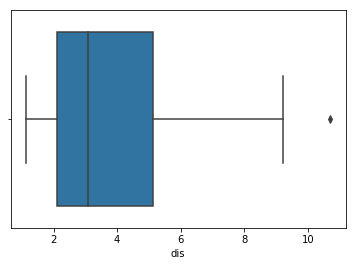

In [42]:
sb.boxplot(x=dataTrain['dis'])

In [43]:
# Finding X and y
# X = dataTrain.loc[:,['crim','zn','indus','chas','nox','rm','age','dis','rad','ptratio','black','lstat']]
X = dataTrain.loc[:,['indus','nox','age','dis','rad','ptratio','lstat']]

from sklearn.preprocessing import scale
# X=pd.DataFrame(scale(X))

y = dataTrain.medv
X_train, X_test, y_train, y_test = train_test_split(X,y)
# X_testData = dataTest.loc[:,['crim','zn','indus','chas','nox','rm','age','dis','rad','ptratio','black','lstat']]
X_testData = dataTest.loc[:,['indus','nox','age','dis','rad','ptratio','lstat']]

In [44]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
y_predict=model_lr.predict(X_test)

In [46]:
print(r2_score(y_test,y_predict))

0.5911289896303451


In [47]:
# Upon direct application of linear trgression, the r2_score is very low.

In [48]:
# Missing value analysis.
